In [2]:
!git clone --recursive https://github.com/shaoanlu/fewshot-face-translation-GAN.git

Cloning into 'fewshot-face-translation-GAN'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 971 (delta 33), reused 41 (delta 18), pack-reused 910
Receiving objects: 100% (971/971), 13.24 MiB | 7.16 MiB/s, done.
Resolving deltas: 100% (174/174), done.
Submodule 'face_toolbox_keras' (https://github.com/shaoanlu/face_toolbox_keras.git) registered for path 'face_toolbox_keras'
Cloning into '/content/fewshot-face-translation-GAN/face_toolbox_keras'...
remote: Enumerating objects: 43, done.        
remote: Counting objects: 100% (43/43), done.        
remote: Compressing objects: 100% (31/31), done.        
remote: Total 273 (delta 18), reused 29 (delta 11), pack-reused 230        
Receiving objects: 100% (273/273), 247.62 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (122/122), done.
Submodule path 'face_toolbox_keras': checked out 'fb472da7d6138845930bb86ca1993f5aaac6d78e'


In [3]:
# using the required version of keras and tensorflow
!pip install keras==2.2.4
!pip install tensorflow==1.12.0

     |████████████████████████████████| 317kB 2.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
     |████████████████████████████████| 83.1MB 41kB/s 
     |████████████████████████████████| 3.1MB 33.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
%cd "fewshot-face-translation-GAN"

/content/fewshot-face-translation-GAN


### Download the pretrianed model and import it.

In [5]:
!gdown https://drive.google.com/uc?id=1DUMmZGTGKMyEYSKy-w34IDHawVF24rIs
!gdown https://drive.google.com/uc?id=1xl8cg7xaRnMsyiODcXguJ83d5hwodckB

Downloading...
From: https://drive.google.com/uc?id=1DUMmZGTGKMyEYSKy-w34IDHawVF24rIs
To: /content/fewshot-face-translation-GAN/encoder.h5
6.26MB [00:00, 19.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xl8cg7xaRnMsyiODcXguJ83d5hwodckB
To: /content/fewshot-face-translation-GAN/decoder.h5
124MB [00:02, 48.0MB/s]


In [0]:
!mkdir weights
!mv decoder.h5 weights/decoder.h5
!mv encoder.h5 weights/encoder.h5

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from models import FaceTranslationGANInferenceModel

Using TensorFlow backend.


In [15]:
model = FaceTranslationGANInferenceModel()

Found checkpoints in weights folder. Built model with pre-trained weights.


In [0]:
from face_toolbox_keras.models.verifier.face_verifier import FaceVerifier
fv = FaceVerifier(classes=512)

from face_toolbox_keras.models.parser import face_parser
fp = face_parser.FaceParser()

from face_toolbox_keras.models.detector import face_detector
fd = face_detector.FaceAlignmentDetector()

from face_toolbox_keras.models.detector.iris_detector import IrisDetector
idet = IrisDetector()

### Upload source and target pictures

In [0]:
import numpy as np
from utils import utils
from matplotlib import pyplot as plt

In [0]:
from google.colab import files

In [207]:
fn_src = files.upload()

Saving IMG_1544.JPG to IMG_1544 (4).JPG


In [208]:
fns_tar = files.upload()

Saving IMG_1582.jpg to IMG_1582 (2).jpg


In [209]:
fn_src = [k for k,v in fn_src.items()]
if len(fn_src) >= 1:
    fn_src = fn_src[0]

fns_tar = [k for k,v in fns_tar.items()]

print(fn_src)
print(fns_tar)

IMG_1544.JPG
['IMG_1582.jpg']


In [0]:
src, mask, aligned_im, (x0, y0, x1, y1), landmarks = utils.get_src_inputs(fn_src, fd, fp, idet)
tar, emb_tar = utils.get_tar_inputs(fns_tar, fd, fv)

In [0]:
out = model.inference(src, mask, tar, emb_tar)

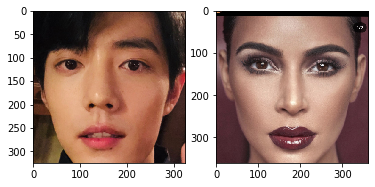

In [212]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(tar)

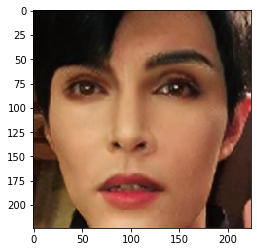

In [213]:
result_face = np.squeeze(((out[0] + 1) * 255 / 2).astype(np.uint8))
plt.imshow(result_face)

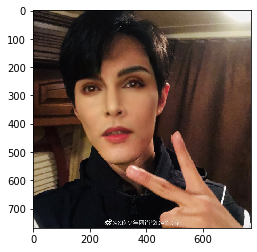

In [214]:
result_img = utils.post_process_result(fn_src, fd, result_face, aligned_im, src, x0, y0, x1, y1, landmarks)
plt.imshow(result_img)